# FastSMC minimal working example notebook

This notebook demonstrates a minimal working example of the FastSMC python bindings, where sensible default parameters are set automatically.

Please make sure you have installed the python bindings by following the instructions in `../README.md` before attempting to run this notebook.

The example dataset was simulated using the setup described in the paper, corresponding to SNP data for 150 diploid individuals and a chromosomal region of 30 Mb, with recombination rate from chromosome 2 and under a European demographic model (see https://www.biorxiv.org/content/10.1101/2020.04.20.029819v1 for more details).

1) Import `asmc` which is installed with the Python bindings

In [1]:
from asmc import *

2) Specify paths for input (example provided with this repository) and output. Input is expected to have the following files:
- `<input_files_root>.decodingQuantities.gz`
- `<input_files_root>.hap.gz`
- `<input_files_root>.map`
- `<input_files_root>.samples`

In [2]:
input_files_root = '../FILES/FASTSMC_EXAMPLE/example'
output_files_root = '../notebooks/tmp_output_minimal'

3) Create the Python FastSMC object and run it. This should only take a few seconds.

In [3]:
fast_smc = FastSMC(in_dir=input_files_root, out_dir=output_files_root)
fast_smc.run()

4) Read data, add column names, filter to remove IBD segments with extremely low IBD score, and calculate a summary statistic of IBD segment length

In [4]:
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv(f'{output_files_root}.1.1.FastSMC.ibd.gz', sep='\t', header=None)

data.columns = ['ind1_famid', 'ind1_id', 'ind1_hap', 'ind2_famid', 'ind2_id', 'ind2_hap',
                'chromosome', 'ibd_start', 'ibd_end', 'ibd_score', 'post_est', 'map_est']

filtered = data[data['ibd_score'] > 0.1]

# Calculate IBD segment length in number of base pairs
filtered.insert(9, 'ibd_length', data['ibd_end'] - data['ibd_start'] + 1)
filtered

,ind1_famid,ind1_id,ind1_hap,ind2_famid,ind2_id,ind2_hap,chromosome,ibd_start,ibd_end,ibd_length,ibd_score,post_est,map_est
0,1_94,1_94,1,1_104,1_104,1,1,8740,1660011,1651272,0.413363,149.110123,24.999928
2,1_121,1_121,2,1_124,1_124,1,1,8740,1592010,1583271,0.316183,244.204498,34.999920
3,1_33,1_33,1,1_127,1_127,2,1,8740,1679626,1670887,0.416071,167.208542,24.999928
5,1_81,1_81,1,1_105,1_105,1,1,8740,1608858,1600119,0.338173,157.959915,24.999928
6,1_35,1_35,1,1_99,1_99,2,1,8740,1660011,1651272,0.405641,165.387192,24.999928
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,1_131,1_131,1,1_135,1_135,2,1,21527883,29849472,8321590,0.988980,25.776878,4.999943
1607,1_28,1_28,1,1_131,1_131,1,1,21527883,29849472,8321590,0.988980,25.776878,4.999943
1611,1_43,1_43,1,1_129,1_129,2,1,20052325,29849472,9797148,0.995925,22.189177,4.999943
1612,1_28,1_28,1,1_135,1_135,2,1,5694783,5694783,1,0.347211,6811.793457,4.999943


5) Visualise data: here we simply bin the posterior age estimates of the IBD segments, and the IBD segment length

<AxesSubplot:xlabel='MAP age estimate (in generations)'>

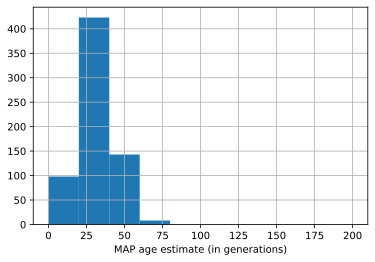

In [5]:
plt.xlabel("MAP age estimate (in generations)")
filtered['map_est'].hist(range=(0, 200))

<AxesSubplot:xlabel='IBD segments length (in Mbp)'>

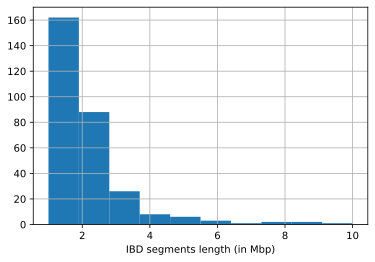

In [6]:
plt.xlabel("IBD segments length (in Mbp)")
(filtered['ibd_length'] / 1000000).hist(range=(1, 10))